In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]
data = pd.read_csv("StudentPerformanceFactors.csv")

LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)
NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)
PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)
EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)
GENDERMAP = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(GENDERMAP)
NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)
SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [31]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [33]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6529 non-null   float64
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

In [34]:
# Statistical Summary
data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6529.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6540.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,2.197580,0.304071,0.190858,2.967610,0.105191,1.682458,2.493272,0.422733,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.599878,0.460048,0.755876,1.031231,0.306823,0.799428,0.671749,0.494031,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,3.000000,0.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,3.000000,1.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000


In [37]:
# Find the index of the maximum hours studied
max_hours_index = data['Hours_Studied'].idxmax()

# Retrieve and print the row with the maximum hours studied
max_hours_data = data.loc[max_hours_index]
print(max_hours_data)

Hours_Studied                 44.0
Attendance                    68.0
Parental_Involvement           3.0
Access_to_Resources            1.0
Extracurricular_Activities     0.0
Sleep_Hours                    9.0
Previous_Scores               75.0
Motivation_Level               1.0
Internet_Access                1.0
Tutoring_Sessions              3.0
Family_Income                  2.0
Teacher_Quality                3.0
School_Type                    1.0
Peer_Influence                -1.0
Physical_Activity              2.0
Learning_Disabilities          0.0
Parental_Education_Level       1.0
Distance_from_Home             2.0
Gender                         1.0
Exam_Score                    71.0
Name: 2895, dtype: float64


In [12]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
# Correlation Matrix ( Numeric Only )
(data.corr(numeric_only=True))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Hours_Studied,1.000000,-0.009908,-0.016092,-0.005452,-0.006017,0.010977,0.024846,-0.010396,0.005038,-0.014282,0.000762,-0.004068,-0.000299,0.009698,0.004624,-0.014401,-0.010898,-0.012466,0.004241,0.445455
Attendance,-0.009908,1.000000,-0.009313,-0.011508,-0.002222,-0.015918,-0.020186,-0.005010,-0.018318,0.014324,-0.012774,-0.001645,0.018645,-0.007519,-0.022435,-0.022231,0.024756,0.020264,-0.008040,0.581072
Parental_Involvement,-0.016092,-0.009313,1.000000,-0.026557,-0.021881,-0.007945,-0.021074,-0.022393,0.012457,-0.002107,0.012383,0.013059,0.016736,0.021313,-0.005383,0.006339,-0.005903,0.007126,0.016133,0.157114
Access_to_Resources,-0.005452,-0.011508,-0.026557,1.000000,-0.008205,-0.014505,0.023864,0.006206,-0.013946,-0.011774,-0.004210,-0.010321,0.020593,-0.001247,-0.009997,-0.006102,-0.005908,0.001100,0.000066,0.169770
Extracurricular_Activities,-0.006017,-0.002222,-0.021881,-0.008205,1.000000,0.001379,0.004354,0.016115,-0.005345,0.003192,-0.009040,0.017398,-0.005655,0.009142,-0.001032,-0.008288,0.007131,-0.013818,-0.007945,0.064382
Sleep_Hours,0.010977,-0.015918,-0.007945,-0.014505,0.001379,1.000000,-0.021750,0.001031,0.011901,-0.012216,-0.018915,0.006761,-0.002775,-0.016867,-0.000378,0.015392,0.010314,0.002927,0.007479,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021074,0.023864,0.004354,-0.021750,1.000000,0.006460,0.004304,-0.013122,-0.013661,-0.003296,-0.013452,-0.017982,-0.011274,0.007057,-0.009153,0.006117,-0.001021,0.175079
Motivation_Level,-0.010396,-0.005010,-0.022393,0.006206,0.016115,0.001031,0.006460,1.000000,0.019203,0.001258,0.011064,-0.013015,-0.013754,-0.000302,-0.007388,-0.000703,-0.003331,-0.002326,-0.013982,0.086937
Internet_Access,0.005038,-0.018318,0.012457,-0.013946,-0.005345,0.011901,0.004304,0.019203,1.000000,-0.010071,0.002343,0.000393,-0.012786,-0.010429,-0.012867,0.006517,-0.007491,-0.010616,-0.015139,0.051475
Tutoring_Sessions,-0.014282,0.014324,-0.002107,-0.011774,0.003192,-0.012216,-0.013122,0.001258,-0.010071,1.000000,0.005083,0.001452,-0.008257,-0.005139,0.017733,0.007564,0.006435,0.018079,0.006734,0.156525


In [29]:
(correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

Attendance                Exam_Score    0.581072
Hours_Studied             Exam_Score    0.445455
Previous_Scores           Exam_Score    0.175079
Access_to_Resources       Exam_Score    0.169770
Parental_Involvement      Exam_Score    0.157114
Tutoring_Sessions         Exam_Score    0.156525
Parental_Education_Level  Exam_Score    0.101940
Peer_Influence            Exam_Score    0.100217
Family_Income             Exam_Score    0.094555
Distance_from_Home        Exam_Score    0.091110
dtype: float64

In [30]:
(correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

Parental_Involvement   Previous_Scores              -0.021074
Sleep_Hours            Previous_Scores              -0.021750
Parental_Involvement   Extracurricular_Activities   -0.021881
Attendance             Learning_Disabilities        -0.022231
Parental_Involvement   Motivation_Level             -0.022393
Attendance             Physical_Activity            -0.022435
Family_Income          Physical_Activity            -0.022820
Parental_Involvement   Access_to_Resources          -0.026557
Physical_Activity      Parental_Education_Level     -0.026800
Learning_Disabilities  Exam_Score                   -0.085066
dtype: float64

In [43]:
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
# Set color stuff i change change lng and map values kay ugly

def color_data(c_key):
    color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
    colors = None   # No color mapping in case invalid ang c_key
    if c_key in data.keys():
        if c_key in ENUMDATA:
            colors = data[c_key].map(color_map) # if data is enum get colors from map
        else:
            colors = c_key                      # if data already numerical get colors from gradient
    return colors

Slope: 0.28929062860968324       Intercept: 61.45698360950434


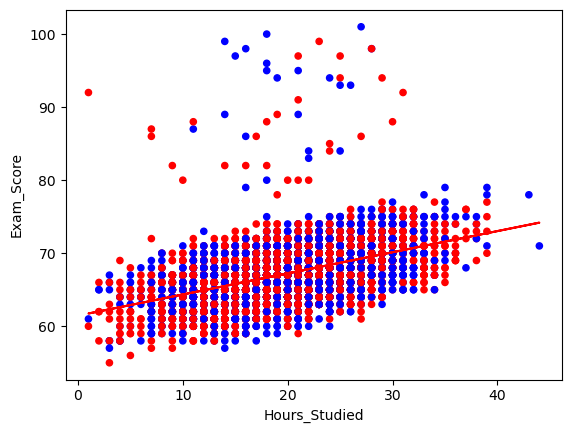

In [44]:
# Visualization Scatter Plot with Regresion
y_key = "Exam_Score"
c_key = "Gender"
x_key = "Hours_Studied"

#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=color_data(c_key))

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: 0.0007960504026209089       Intercept: 2.9517087416397962


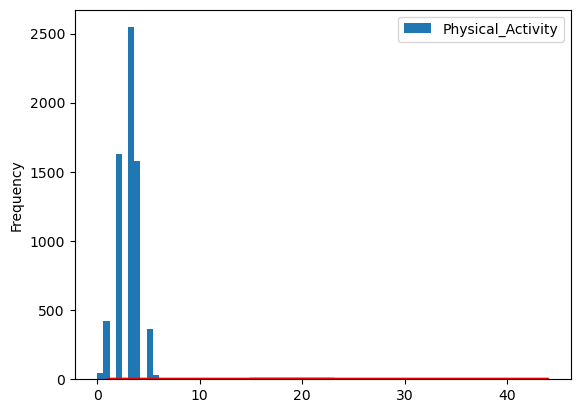

In [61]:
# Visualization Scatter Plot with Regresion
y_key = "Physical_Activity"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: -0.0018682715767054786       Intercept: 2.1237428300105177


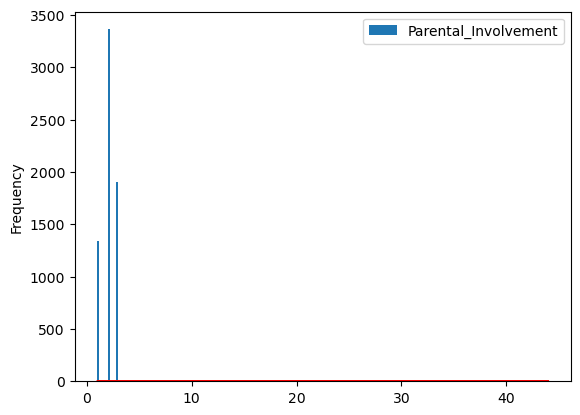

In [65]:

# Visualization Scatter Plot with Regresion
y_key = "Parental_Involvement"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')